<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/Airline_seat_review_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install NLTK
import nltk
#nltk.download()
!pip install wordcloud

In [ ]:
import pandas as pd

df = pd.read_csv("/content/seat.csv")

In [ ]:
print(df.head())

In [ ]:
print(df.info())

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt


In [ ]:
df.describe()

In [ ]:
df=df[["content","recommended"]]

In [ ]:
df.head()

In [ ]:
x= df[["content"]]
x.columns=["Reviews"]
#
x.describe()

In [ ]:
y=df[["recommended"]]
y.columns=["Recommended"]
y.describe()

In [ ]:
contractions_dict = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
}

In [ ]:
reviews=x["Reviews"].tolist()
print(reviews)
import string

#removing contractions
reviews_after_contractions=[]
for review in reviews:
  new_item=' '.join(str(contractions_dict.get(word, word)) for word in review.split())
  reviews_after_contractions.append(new_item)
print(reviews_after_contractions)

In [ ]:
docs_no_punctuation = []
regex=r"[\x96\x92\x94x93\x85\t]"
for item in reviews_after_contractions:
    text = item.translate(str.maketrans('', '', string.punctuation))
    docs_no_punctuation.append(text)
print(docs_no_punctuation)


In [ ]:
#TOKENIZATION
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens = []
for item in docs_no_punctuation:
    tokens.append(word_tokenize(item))
print(tokens)

In [ ]:
# removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
tokens_no_stopwords = []
for doc in tokens:
  new_vector=[]
  for word in doc:
    if word not in stopwords.words('english'):
      new_vector.append(word)
  tokens_no_stopwords.append(new_vector)
print(tokens_no_stopwords)

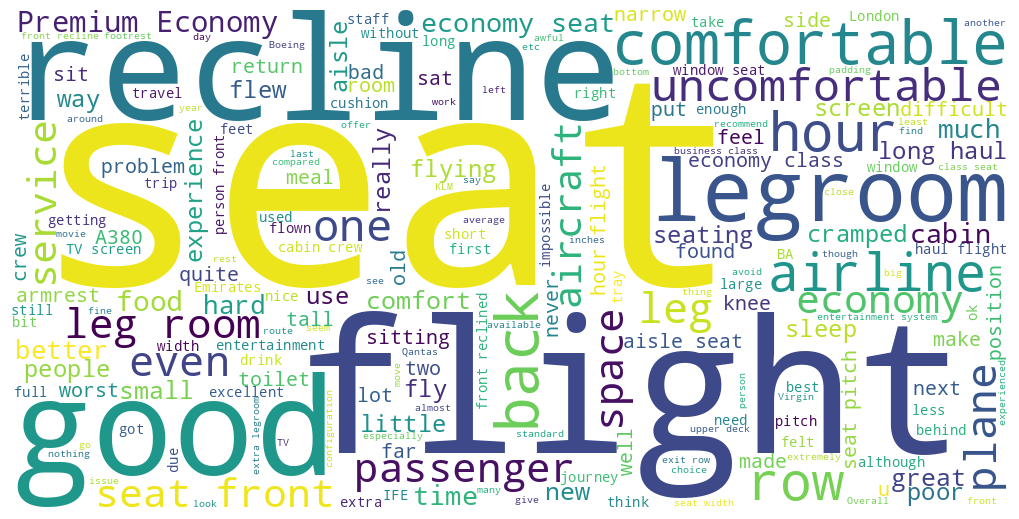

In [ ]:
#creating wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words_all=[]
for item in tokens_no_stopwords:
  words_all=words_all + item
  wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                min_font_size = 10).generate(" ".join(words_all))
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [30]:
#lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn

pos_tokens = [nltk.pos_tag(token) for token in tokens_no_stopwords]
print(pos_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[[('LHR', 'NNP'), ('Larnaca', 'NNP'), ('return', 'VBP'), ('Plane', 'NNP'), ('clean', 'JJ'), ('good', 'JJ'), ('condition', 'NN'), ('Drinks', 'NNP'), ('served', 'VBD'), ('throughout', 'IN'), ('flights', 'NNS'), ('Food', 'NNP'), ('good', 'NN'), ('Would', 'NNP'), ('definitely', 'RB'), ('hesitate', 'VBP'), ('use', 'JJ'), ('airline', 'NN'), ('European', 'JJ'), ('trips', 'NNS')], [('For', 'IN'), ('short', 'JJ'), ('haul', 'NN'), ('airline', 'NN'), ('seats', 'NNS'), ('good', 'JJ'), ('I', 'PRP'), ('find', 'VBP'), ('seats', 'JJ'), ('comfortable', 'JJ'), ('plenty', 'NN'), ('leg', 'NN'), ('room', 'NN')], [('The', 'DT'), ('seats', 'NNS'), ('bit', 'VBP'), ('tight', 'JJ'), ('bearable', 'JJ'), ('If', 'IN'), ('courteous', 'JJ'), ('others', 'NNS'), ('courteous', 'JJ'), ('Everyone', 'NNP'), ('seat', 'NN'), ('ask', 'NN'), ('neighbor', 'NN'), ('front', 'VBD'), ('back', 'RB'), ('issues', 'NNS'), ('come', 'VBP'), ('good', 'JJ')], [('Appeared', 'NNP'), ('new', 'JJ'), ('Good', 'NNP'), ('PTV', 'NNP'), ('entertai

In [34]:
from nltk.stem import WordNetLemmatizer
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
lemmatizer = WordNetLemmatizer()
recommended = []
def wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wn.ADJ
    elif nltk_pos.startswith('V'):
        return wn.VERB
    elif nltk_pos.startswith('N'):
        return wn.NOUN
    elif nltk_pos.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

for item in pos_tokens:
    sentiment =0.0
    for word, tag in item:
        lemma = lemmatizer.lemmatize(word, wordnet_pos(tag))
        if not lemma:
            continue

        synsets = wn.synsets(lemma, wordnet_pos(tag))
        if not synsets:
            continue

        synset = synsets[0]
        print(synset.name())
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()


    if sentiment>0:
      sentiment=1
    else:
      sentiment=0
    recommended.append(sentiment)
print(recommended)

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Streaming output truncated to the last 5000 lines.
tokyo.n.01
chicago.n.01
food.n.01
good.a.01
comfort.n.01
degree.n.01
atrocious.s.03
iodine.n.01
strongly.r.01
recommend.v.01
fly.v.01
like.n.01
mention.v.01
new.a.01
seat.n.01
atrocious.s.02
difficult.a.01
uncomfortable.a.01
flight.n.01
hour.n.01
leg.n.01
room.n.01
great.s.01
about.r.07
four.n.01
hour.n.01
seat.n.01
get.v.01
painful.a.01
desire.v.01
cheap.a.01
flight.n.01
person.n.01
must.n.01
able.a.01
design.n.01
less.r.01
painful.a.01
cheap.a.01
seat.n.01
besides.r.02
fly.v.01
dublin.n.01
day.n.01
seat.n.01
far.r.01
comfortable.a.01
airplane.n.01
hour.n.01
flight.n.01
flight.v.01
food.n.01
hapless.s.01
seat.n.01
bad.a.01
flight.n.01
bad.a.01
iodine.n.01
know.v.01
even.r.01
fuss.n.02
supply.v.01
seat.n.01
indicate.v.02
besides.r.02
size.v.01
seat_belt.n.01
arbitrary.a.01
iodine.n.01
one.n.01
seat.n.01
row.n.01
travel.v.01
newark.n.01
inch.n.01
gap.n.01
buckle.n.01
interpolation.n.01
side.n.01
iodine.n.01
unable.a.01
maneuver.n.01
iod

In [35]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, recommended)

0.6955484896661367

TypeError: 'tuple' object is not callable